In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
import os
import h5py
import torch
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# plotly for more interactive visualisation
import plotly
import plotly.graph_objs as go
from glob import glob

from constants import DATASET_HDF
from constants import GENERATED_PATH
from constants import CLASSES
from constants import RANDOM_SEED

torch.manual_seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

In [3]:
with h5py.File(DATASET_HDF, 'r') as hdf:
    classes = list(hdf.keys()) if len(CLASSES) == 0 else CLASSES
    
    models = []
    for c in classes:
        dataset = np.random.choice(list(hdf[c].keys()))
        models.append(np.array(hdf[c][dataset]))

In [4]:
def plot_matplotlib(data, threshold=1.0):
    x, y, z = np.indices((32, 32, 32))

    fig = plt.figure(figsize=(10,10))
    ax = fig.gca(projection='3d')
    ax.voxels(data >= threshold, facecolor='blue', edgecolor='k')
    plt.show()

In [5]:
# Configure Plotly to be rendered inline in the notebook.
plotly.offline.init_notebook_mode()

def plot_plotly(data, threshold=1.0):
    x,y,z = np.where(data >= threshold)

    scatter = go.Scatter3d(
        x=x,
        y=y,
        z=z,
        mode='markers',
        marker={
            'symbol': 'square',
            'line': {'width':2, 'color':'DarkSlateGrey'},
            'size': 10,
            'opacity': 1.0,
        }
    )

    # Configure the layout.
    layout = go.Layout(
        margin={'l': 0, 'r': 0, 'b': 0, 't': 0}
    )

    plot_figure = go.Figure(data=[scatter], layout=layout)
    plotly.offline.iplot(plot_figure)

In [6]:
def load_generated_model(filename):
    model = torch.load(file, map_location='cpu')
    model = model.detach().numpy()
    model = model[0,:,:,:,:].squeeze()
    epoch = os.path.splitext(os.path.basename(file))[0].split('_')[-2]
    return model, epoch

# Visualise Training Models

Here is one training model per class.

wardrobe


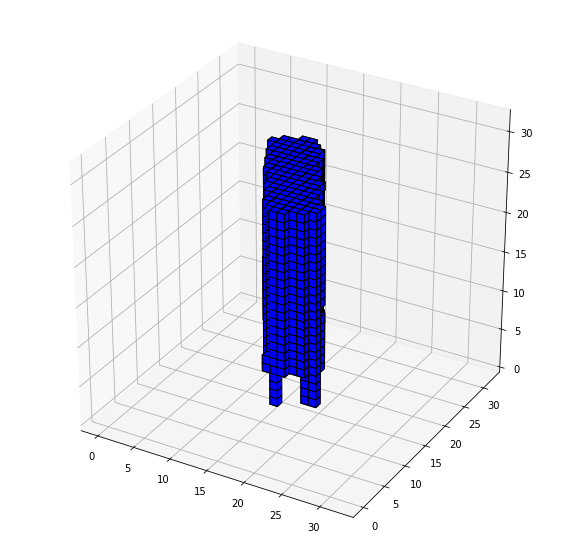

bed


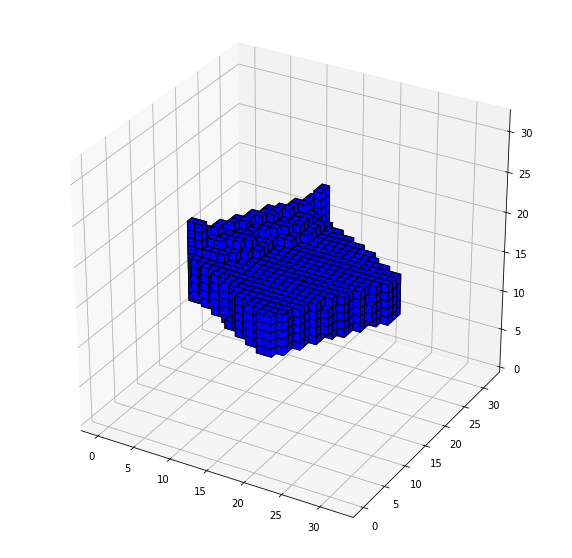

chair


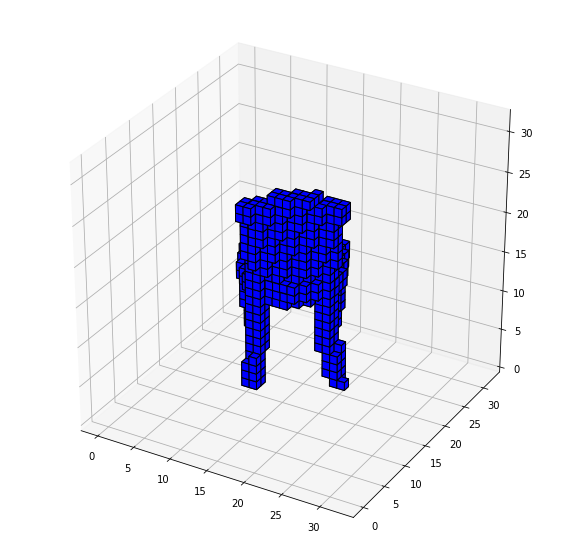

laptop


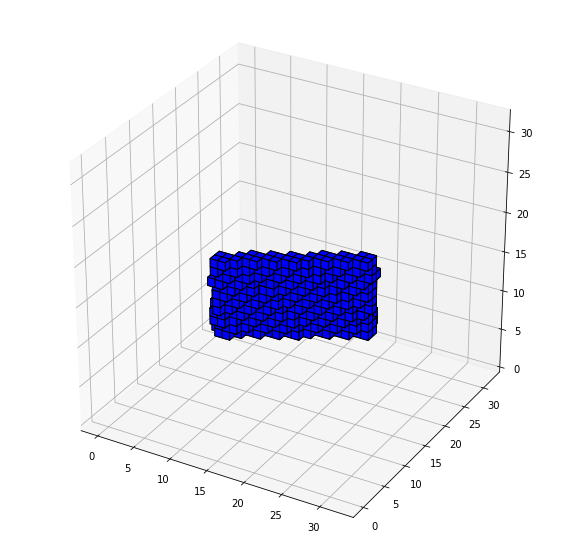

In [7]:
for i, c in enumerate(classes):
    print(c)
    plot_matplotlib(models[i])
    plot_plotly(models[i])

# Visualise Generated Models with Matplotlib

A threshold value of 0.9 is used, meaning if the value for one voxel is bigger than .09, it will be shown.

Model after 0000 epochs


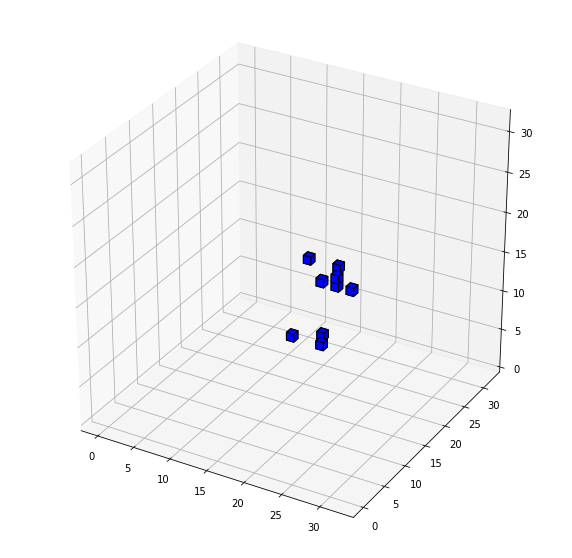

Model after 0010 epochs


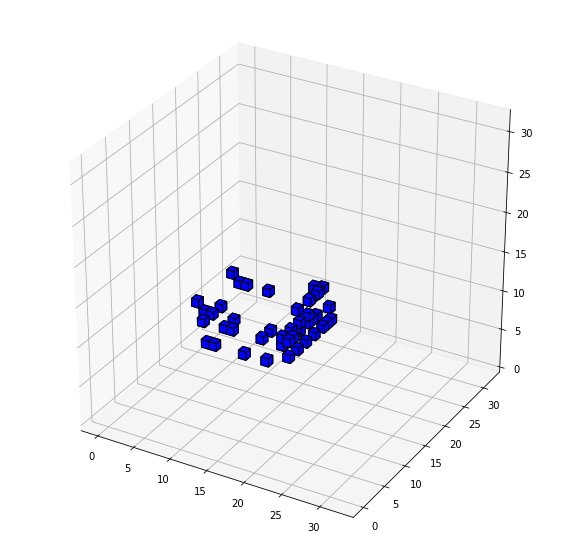

Model after 0020 epochs


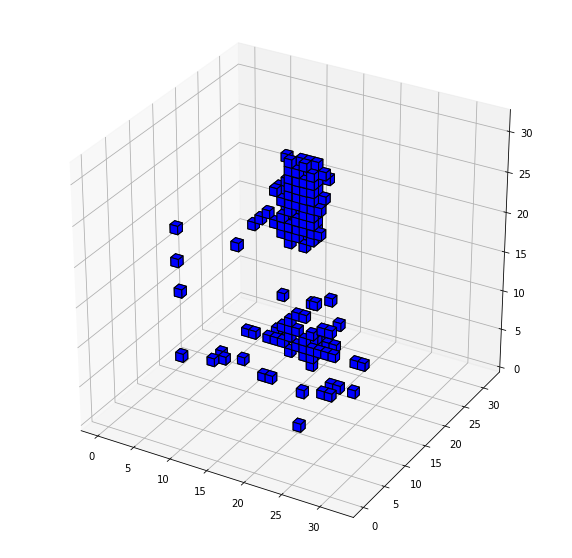

Model after 0030 epochs


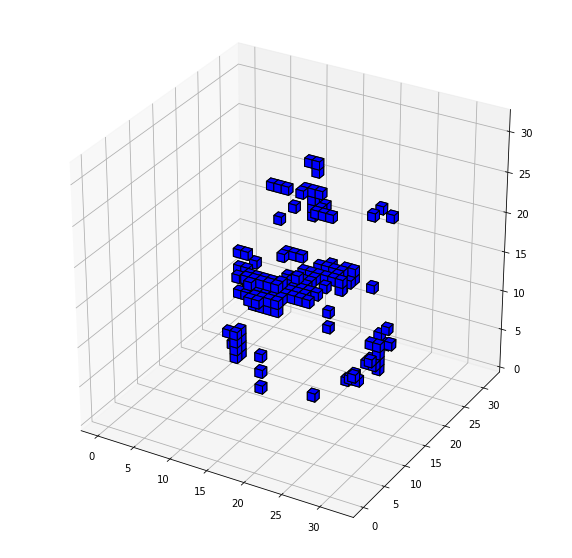

Model after 0040 epochs


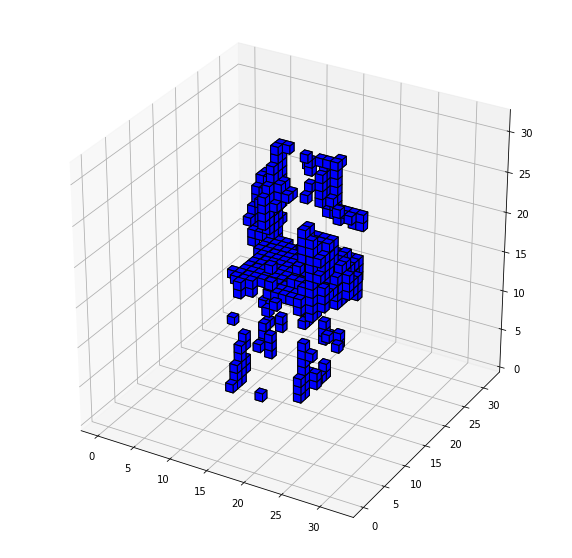

Model after 0050 epochs


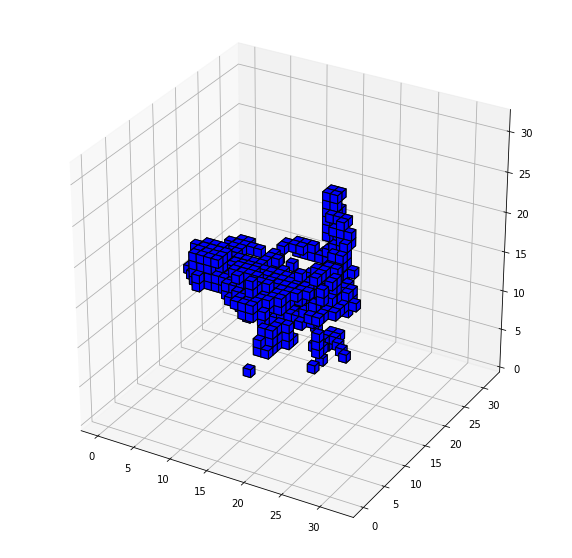

Model after 0060 epochs


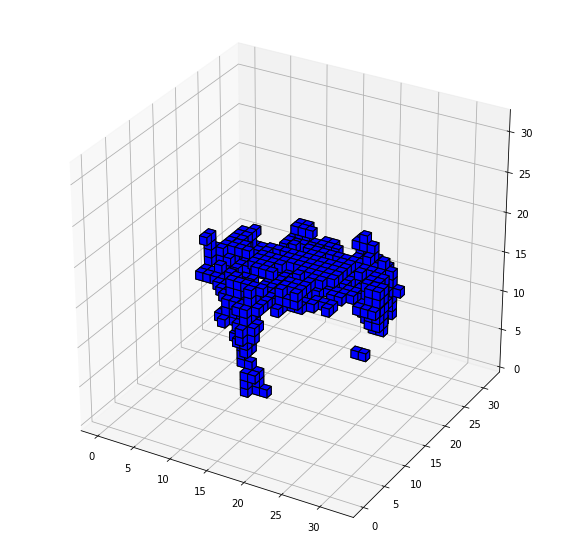

Model after 0070 epochs


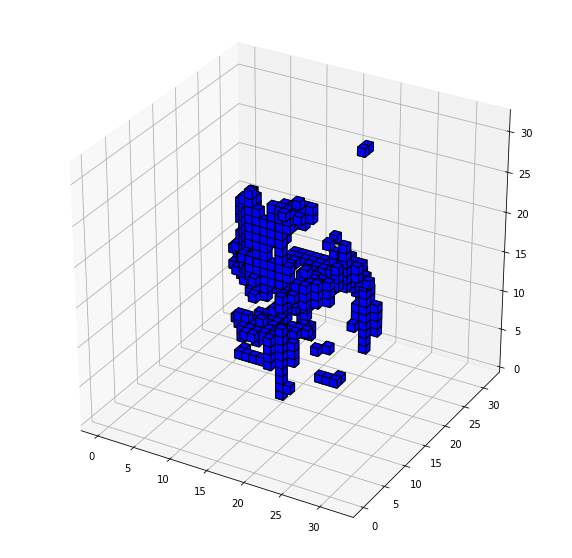

Model after 0080 epochs


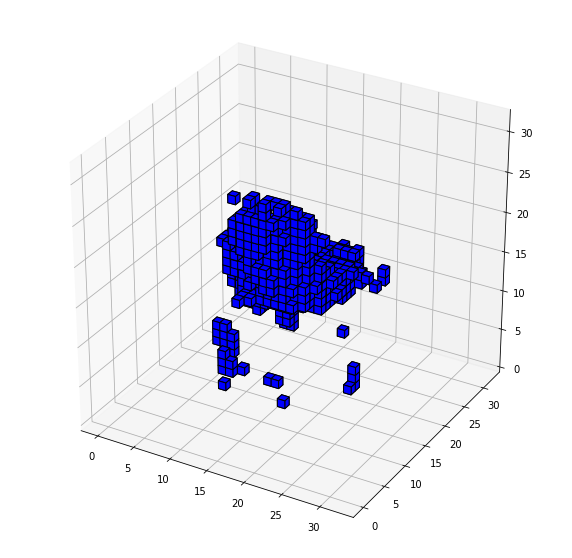

Model after 0090 epochs


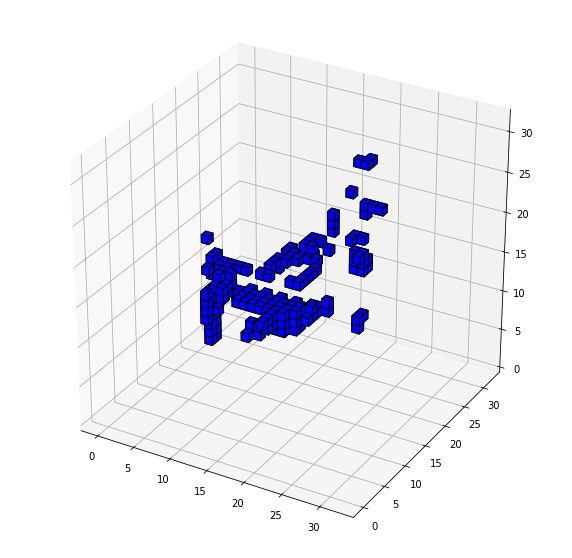

Model after 0100 epochs


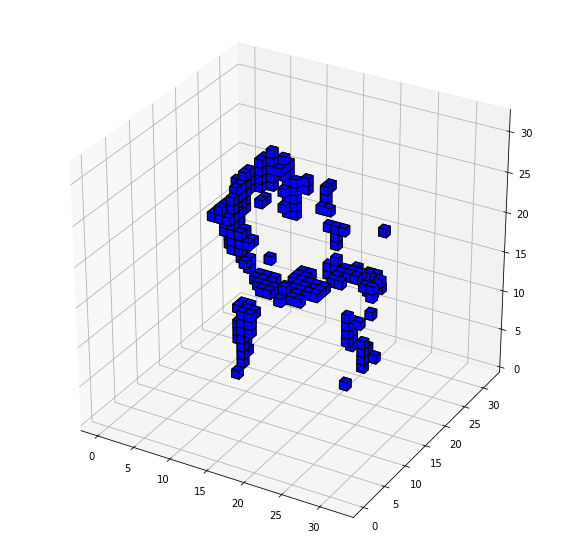

Model after 0110 epochs


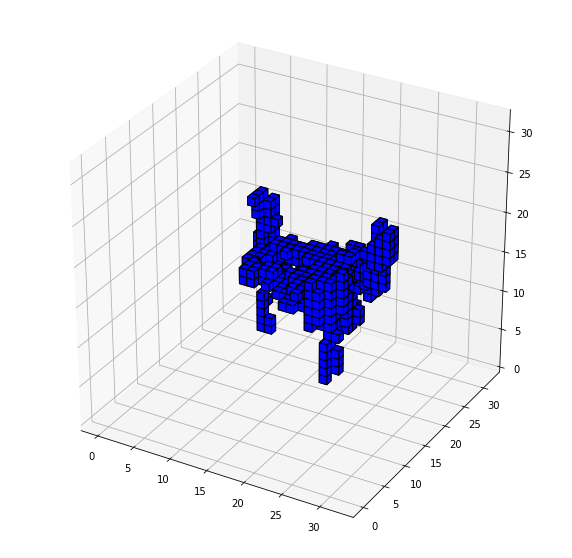

Model after 0120 epochs


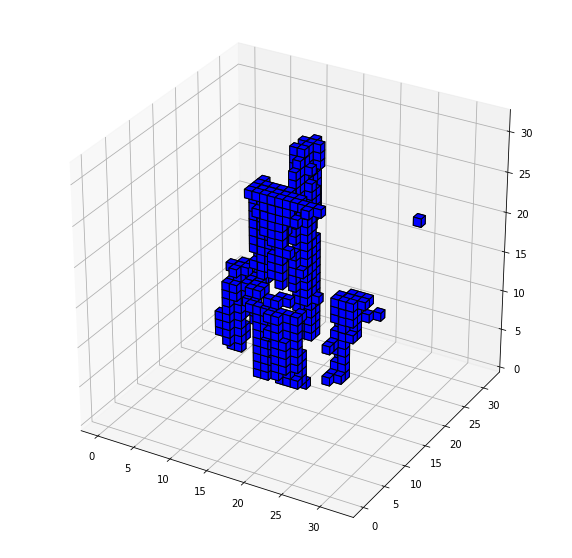

Model after 0130 epochs


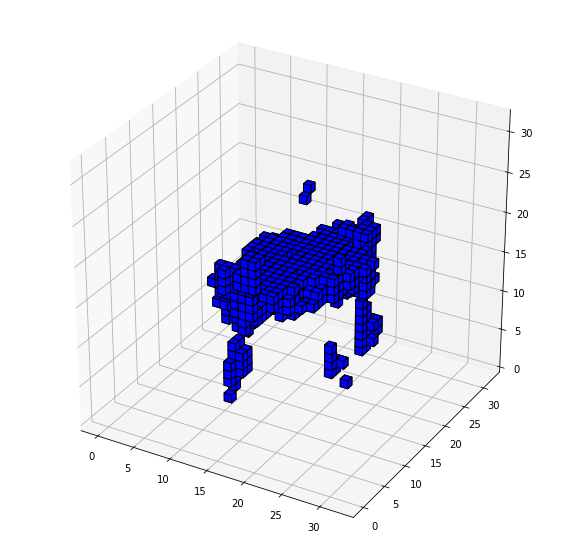

Model after 0140 epochs


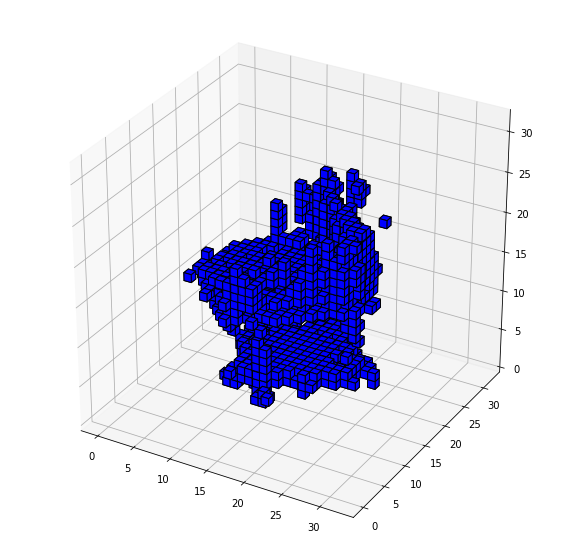

Model after 0150 epochs


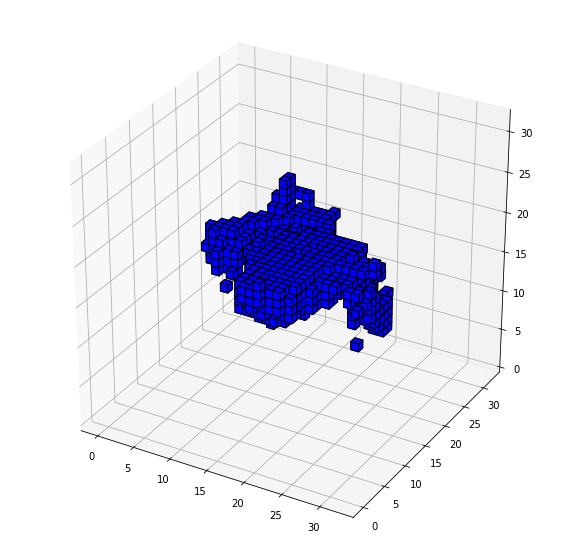

Model after 0160 epochs


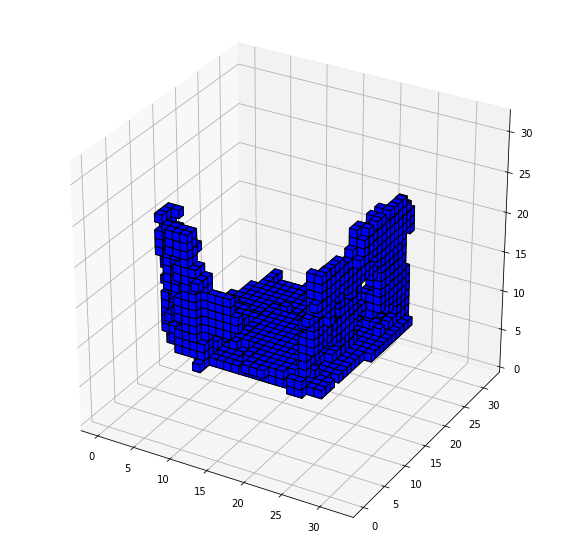

Model after 0170 epochs


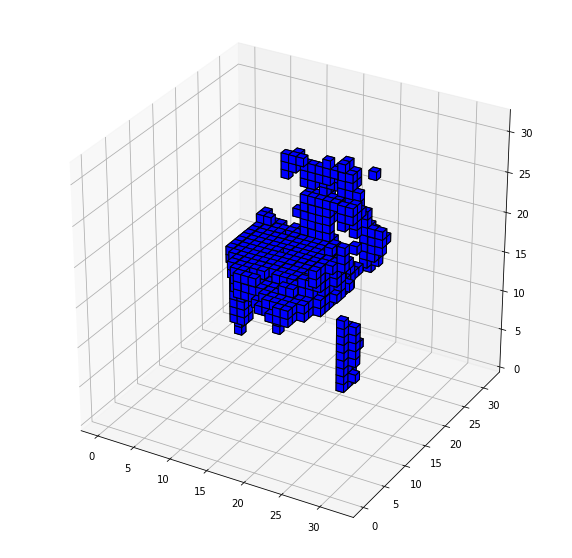

Model after 0180 epochs


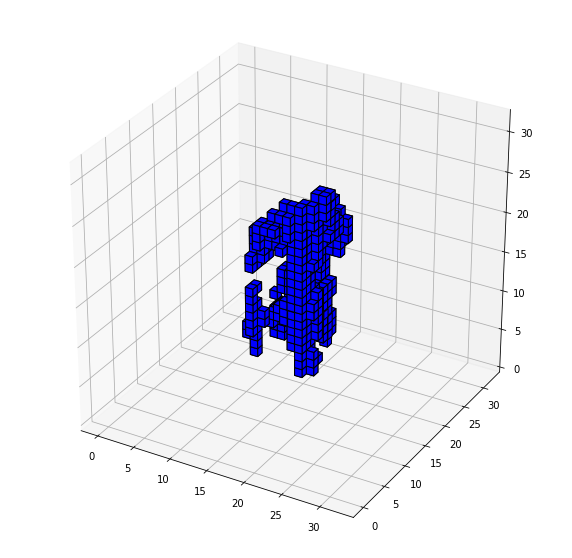

Model after 0190 epochs


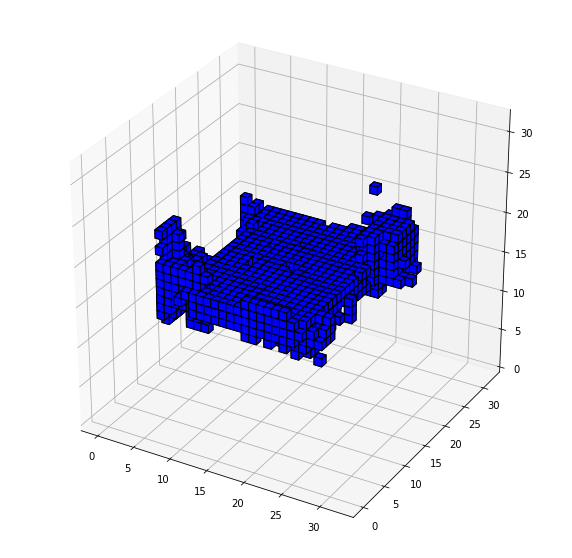

Model after 0200 epochs


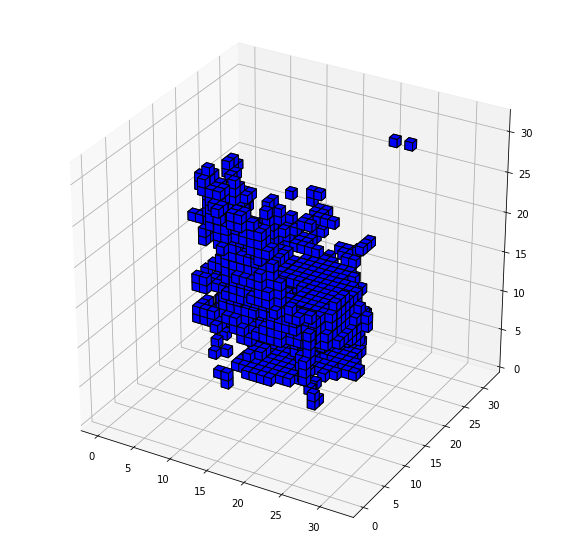

Model after 0210 epochs


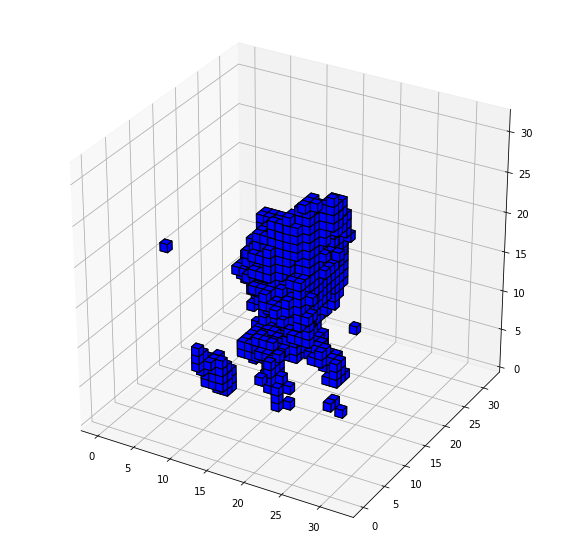

Model after 0220 epochs


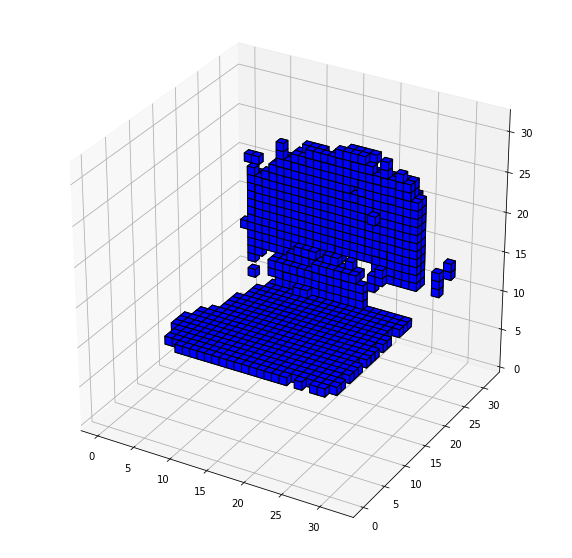

In [8]:
out_files = sorted(glob(GENERATED_PATH + '/*'))
for file in out_files:
    model, epoch = load_generated_model(file)
    print('Model after {:} epochs'.format(epoch))
    plot_matplotlib(model, threshold=0.9)

# Visualise Generated Models with Plotly

Only three models, since 3D visualisation with Plotly is very demanding

Again a threshold value of 0.9 is used, meaning if the value for one voxel is bigger than .09, it will be shown.

In [9]:
for file in [out_files[0], out_files[np.random.randint(0, len(out_files)-1)], out_files[-1]]:
    model, epoch = load_generated_model(file)
    print('Model after {:} epochs'.format(epoch))
    plot_plotly(model, threshold=0.9)

Model after 0000 epochs


Model after 0070 epochs


Model after 0220 epochs
